In [23]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import os
import pickle


In [2]:
path_to_data = '../assets/screenshots/speed_detect/'

In [3]:
img_files = [path_to_data + path for path in os.listdir(path_to_data)]

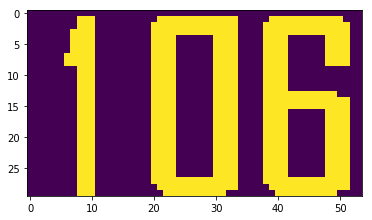

(30, 54)


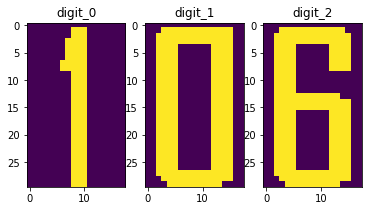

In [16]:
def getSpeedDigits(full_img):
    img = get_speed_img(full_img)
    digit_width = 18
    return [img[:,i*18:(i+1)*18] for i in range(3)]

def get_speed_img(full_img):
    img_x = 156
    img_y = 988
    img_width = 18*3
    img_height = 30
    speed_img = full_img[img_y:img_y+img_height,img_x:img_x + img_width][:,:,:3].mean(axis =2)
    
    if(0<=speed_img.max()<=1):
        speed_img = speed_img*255
    return (speed_img > 240).astype(np.int8)

img = plt.imread(img_files[0])

speed_img = get_speed_img(img)
plt.imshow(speed_img)
plt.show()
print(speed_img.shape)

digits = getSpeedDigits(img)

fig,axes = plt.subplots(ncols=3,nrows=1)
for digit,ax,i in zip(digits,axes,range(len(digits))):
    ax.imshow(digit)
    ax.set_title(f'digit_{i}')
plt.show()

In [17]:
all_digits = []
for img_file in img_files:
    img = plt.imread(img_file)
    digits = getSpeedDigits(img)
    all_digits += digits
len(all_digits)

33

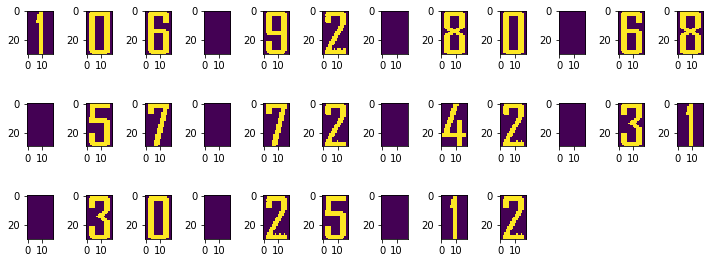

In [32]:
fig,axes = plt.subplots(ncols=12,nrows=3)

fig.set_size_inches(10,4)

for digit,ax in zip(all_digits,axes.flatten()):
    ax.imshow(digit)

for ax in axes.flatten()[len(all_digits):]:
    ax.remove()
    
fig.tight_layout()
    
plt.show()

In [19]:
speed_values = '106 92 80 68 57 72 42 31 30 25 12'
digit_values = list(speed_values)

In [20]:
digit_detector = LogisticRegression()
X = [digit.flatten() for digit in all_digits]
y = digit_values

digit_detector.fit(X,y)
digit_detector.score(X,y)

D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0

In [21]:
def speed_from_image(full_img):    
    value = ("".join(digit_detector.predict(np.array([d.flatten() for d in getSpeedDigits(full_img)]))))
    return value if value!='   ' else None

speed_from_image(plt.imread(img_files[0]))

'106'

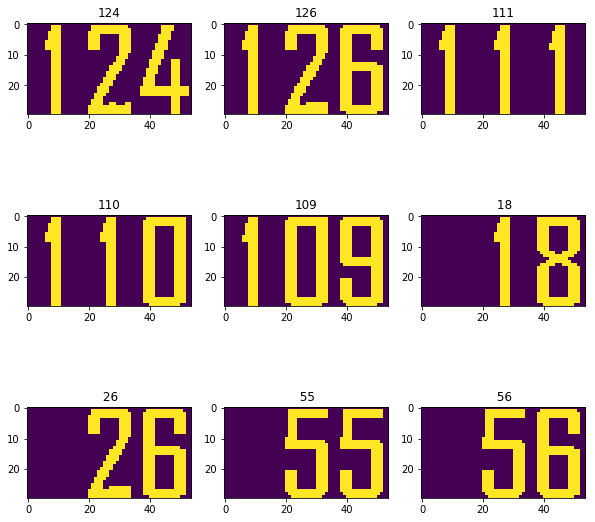

In [22]:
path_to_test = '../assets/bad_gps/'
test_imgs_files = [path_to_test + path for path in os.listdir(path_to_test)]

fig,axes = plt.subplots(ncols=3,nrows=3)
fig.set_size_inches(10,10)

for file,ax in zip(test_imgs_files,axes.flatten()):
    img = plt.imread(file)
    speed_img = get_speed_img(img)
    ax.imshow(speed_img)
    ax.set_title(speed_from_image(img))
    
plt.show()
    
    

In [24]:
with open('digit_detector.pkl', 'wb') as f:
    pickle.dump(digit_detector, f)
